<a href="https://colab.research.google.com/github/realBagher/Tensorflow_sandbox/blob/main/classification/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
from sklearn.datasets import load_breast_cancer  

In [4]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
data.frame

In [12]:
data.target.shape

(569,)

In [13]:
data.data.shape

(569, 30)

In [14]:
from sklearn.model_selection import train_test_split


x_train , x_test , y_train , y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = x_train.shape

In [15]:
print('shape_00 ',N,'shape_01 ',D)

shape_00  381 shape_01  30


In [16]:
import matplotlib.pyplot as plt

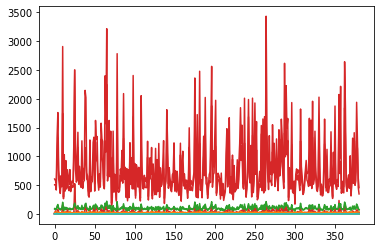

In [17]:
_ = plt.plot(x_train)

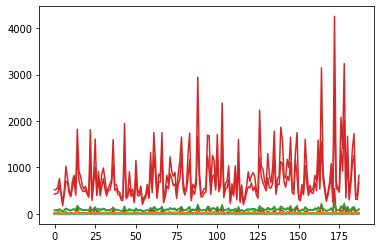

In [18]:
_ = plt.plot(x_test)

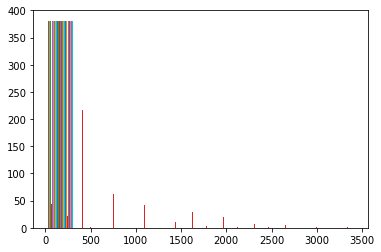

In [19]:
_ = plt.hist(x_train)

In [20]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

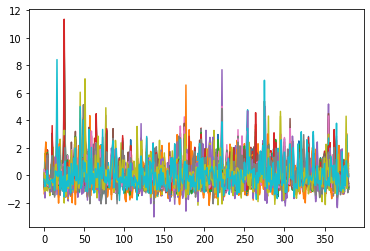

In [21]:
_ = plt.plot(x_train)

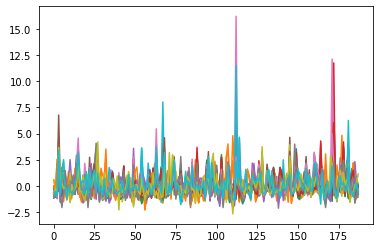

In [22]:
_ = plt.plot(x_test)

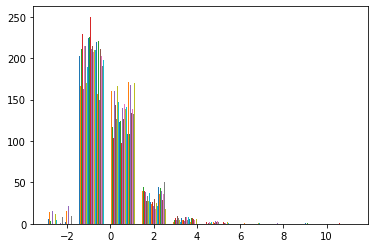

In [23]:
_ = plt.hist(x_train)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 33ms/step - loss: 1.1434 - accuracy: 0.2730 - val_loss: 1.2091 - val_accuracy: 0.2234
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0378 - accuracy: 0.3150 - val_loss: 1.1167 - val_accuracy: 0.3085
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9474 - accuracy: 0.3885 - val_loss: 1.0328 - val_accuracy: 0.3830
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8653 - accuracy: 0.4698 - val_loss: 0.9597 - val_accuracy: 0.4468
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7946 - accuracy: 0.5538 - val_loss: 0.8959 - val_accuracy: 0.5053
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7330 - accuracy: 0.6037 - val_loss: 0.8417 - val_accuracy: 0.5904
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6801 - accuracy: 0.6719 - val_loss: 0.7960 - val_accuracy: 0.6436
Epoch 8/100


In [27]:
print('training data',model.evaluate(x_train,y_train))
print('test data',model.evaluate(x_test,y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9711
training data [0.11474056541919708, 0.9711285829544067]
6/6 [==============================] - 0s 4ms/step - loss: 0.1235 - accuracy: 0.9681
test data [0.12352040410041809, 0.9680851101875305]


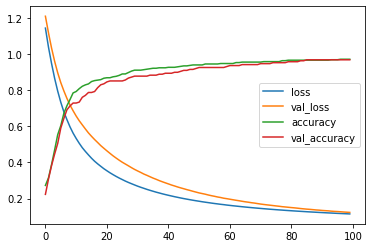

In [28]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

<a name="2"></a>
### 2. Making Predictions using the model
Let's measure the accuracy of the model`s prediction 


In [29]:
p = model.predict(x_test)

6/6 [==============================] - 0s 3ms/step


In [30]:
print(p)

[[9.87684667e-01]
 [9.88775373e-01]
 [8.36440504e-01]
 [1.42948806e-01]
 [9.78412509e-01]
 [9.99205530e-01]
 [9.97005463e-01]
 [4.12757434e-02]
 [9.54574883e-01]
 [8.80607724e-01]
 [9.97627378e-01]
 [8.18336606e-01]
 [4.44692850e-01]
 [9.40751493e-01]
 [3.37704805e-05]
 [1.08112243e-03]
 [7.64070392e-01]
 [9.81442094e-01]
 [9.97926772e-01]
 [9.15508986e-01]
 [9.90666270e-01]
 [9.98640716e-01]
 [2.09138775e-03]
 [9.94431734e-01]
 [5.11589706e-01]
 [9.21407901e-03]
 [8.84128511e-01]
 [2.56392937e-02]
 [9.96453464e-01]
 [3.87110859e-01]
 [6.98581815e-01]
 [3.93833399e-01]
 [9.60861862e-01]
 [9.83392537e-01]
 [9.66912627e-01]
 [7.49129832e-01]
 [2.17613038e-02]
 [9.68288064e-01]
 [9.60025370e-01]
 [9.78872478e-01]
 [9.93175447e-01]
 [9.92558181e-01]
 [9.95897651e-01]
 [2.87177274e-03]
 [9.96285379e-01]
 [9.72728491e-01]
 [3.19981337e-01]
 [9.86089587e-01]
 [9.91201341e-01]
 [9.98591185e-01]
 [4.66334254e-01]
 [9.37899411e-01]
 [9.95335400e-01]
 [9.48917329e-01]
 [9.78056133e-01]
 [9.622117

In [31]:
import numpy as np
p = np.round(p).flatten()

In [32]:
print('accuracy of the model',np.mean(p == y_test))

accuracy of the model 0.9680851063829787


In [33]:
print('model evaluation',model.evaluate(x_test,y_test))

6/6 [==============================] - 0s 4ms/step - loss: 0.1235 - accuracy: 0.9681
model evaluation [0.12352040410041809, 0.9680851101875305]


(array([ 69.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

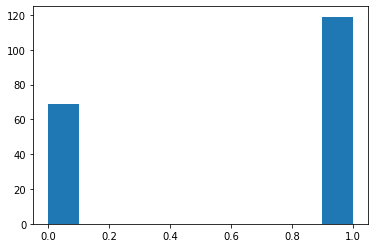

In [39]:
plt.hist(p)